# 📁 Project Setup
# Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import os

# Load Cleaned Data

In [8]:
benin = pd.read_csv('../data/processed/benin_clean.csv')
sierra_leone = pd.read_csv('../data/processed/sierraleone_clean.csv')
togo = pd.read_csv('../data/processed/togo_clean.csv')

# Add a country column to each
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into one dataframe
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

# 📊 Metric Comparison
# Boxplots of GHI, DNI, DHI

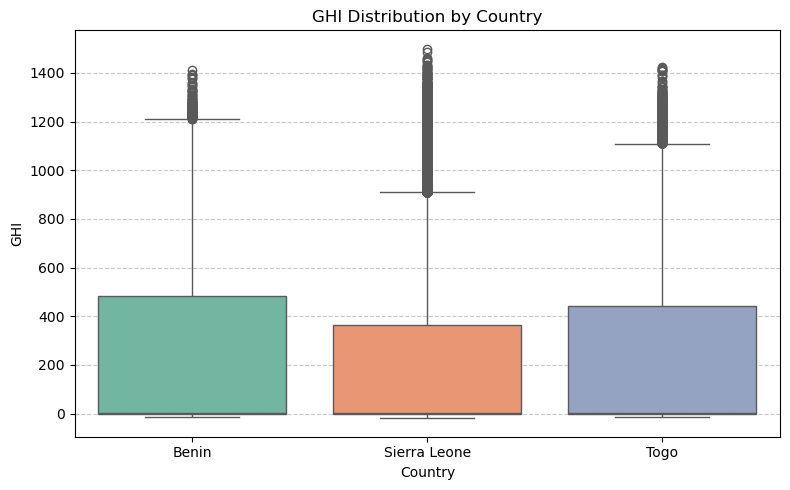

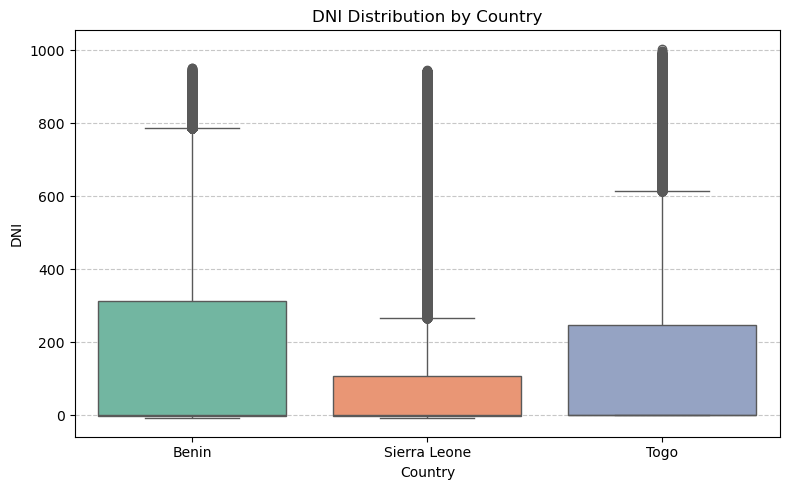

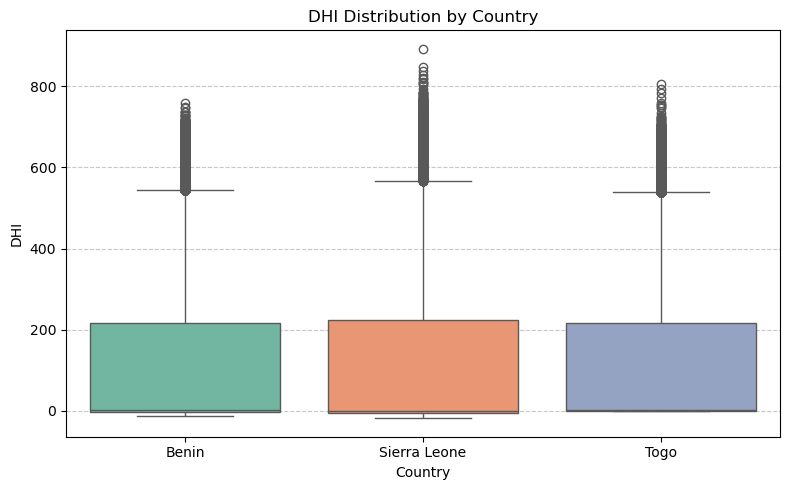

In [9]:
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        x='Country',
        y=metric,
        hue='Country',
        data=df,
        palette='Set2',
        legend=False
    )
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"../reports/{metric}_distribution_boxplot.png", dpi=300)
    plt.show()

#  Summary Table (Mean, Median, Std Dev)

In [10]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.columns = ['_'.join(col) for col in summary.columns]
summary.reset_index(inplace=True)
summary

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.559452,1.8,331.131327,167.187516,-0.1,261.710501,115.358961,1.6,158.691074
1,Sierra Leone,201.957515,0.3,298.495150,116.376337,-0.1,218.652659,113.720571,-0.1,158.946032
2,Togo,230.555040,2.1,322.532347,151.258469,0.0,250.956962,116.444352,2.5,156.520714


# 📐 Statistical Testing
#  Kruskal–Wallis Test on GHI

In [11]:

ghi_benin = benin['GHI']
ghi_sierra_leone = sierra_leone['GHI']
ghi_togo = togo['GHI']

# Kruskal-Wallis test
stat, p = kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)
print(f"Kruskal–Wallis H-statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")




Kruskal–Wallis H-statistic: 4524.8835
P-value: 0.0000


# 🧠 Key Observations


- **Benin** exhibits the **highest average GHI (240.56)** and **DNI (167.19)**, indicating strong potential for **high-efficiency solar panel deployment**, especially in **centralized or industrial-scale installations**. However, the **high standard deviation** across metrics signals significant variability in solar irradiance, which may require **investment in energy storage systems** or **grid stabilization**.

- **Togo** has the **highest median GHI (2.1)** and **DHI (2.5)**, reflecting both **strong and stable solar potential**, making it a **prime candidate for residential and off-grid solar solutions**. The lower variability in DHI further supports this as a consistent source of diffuse solar radiation.

- **Sierra Leone** records the **lowest averages and medians** across GHI, DNI, and DHI, suggesting **limited and less reliable solar potential** in the current dataset. This region might be deprioritized in the immediate rollout unless supported by additional feasibility studies.

- The **Kruskal–Wallis test** shows a **highly significant difference in GHI distributions (H=4524.88, p<0.0001)** across countries, statistically validating the need for **country-specific solar investment strategies**.


# 📊 Visual Summary
# Bar Chart of Average GHI

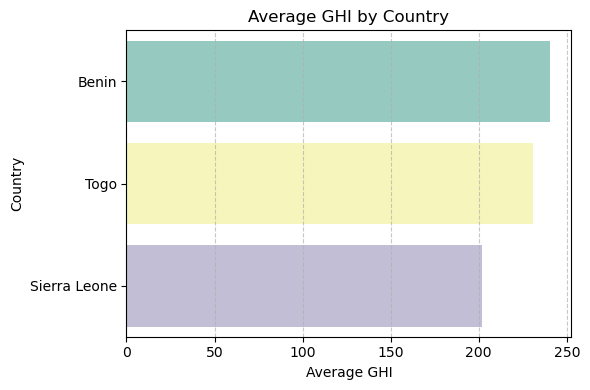

In [12]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(
    x='GHI',
    y='Country',
    hue='Country',
    data=avg_ghi,
    palette='Set3',
    legend=False
)
plt.title('Average GHI by Country')
plt.xlabel('Average GHI')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../reports/Average_GHI_by_Country.png", dpi=300)
plt.show()